In [1]:
import pandas as pd
import numpy as np
import sys
import shutil
import glob
import os
import nibabel as nib
from pathlib import PosixPath
from scipy import ndimage
import matplotlib.pyplot as plt
from pathlib import Path
import random
import json
import itertools
import scipy
from scipy import stats
from scipy.io import loadmat
from scipy import ndimage
import sys
import matplotlib.image as mpimg
import skimage
import nibabel as nib
from skimage.filters import threshold_otsu, rank, threshold_multiotsu
from skimage.morphology import disk

In [17]:
def nifti_loader(filename):
    x = nib.load(filename)
    img = np.asanyarray(x.dataobj)    
    return img
'''
args: path - /path/to/patient_id_t2lesion.nii.gz
'''
def generate_edge_distance_map(path):
    label = path.replace('t2lesion','edge_map')
    
    #load the t2 lesion
    x = nib.load(str(path))
    xs = np.asanyarray(x.dataobj)
    xn = np.float32(xs)
    xn = (xn>0).astype(np.float32())
    
    #calculate the euclidian distance transform
    edge = ndimage.distance_transform_edt(xn>0)
    
    #normalize
    edge /= np.max((edge))
    
    #invert
    edge =abs(1-edge)
    
    #zero outside of lesion
    edge = edge*xn
    
    #normalize
    edge /= np.max((edge))
    
    #add 1 to mitigate vanishing gradients
    edge = edge+1
    
    
    #add small value to center to weight higher than background
    missing_center=edge>1

    boosted=edge

    dif = missing_center-xn
    locs=np.asarray(np.where(dif!=0))
    for i in range(np.shape(np.where(dif!=0))[1]):
        boosted[locs[0][i],locs[1][i],locs[2][i]]=(edge[locs[0][i],locs[1][i],locs[2][i]]+.01)


    
    #save image
    ni_img = nib.Nifti1Image(boosted, x.affine)
    nib.save(ni_img, os.path.join(label))

In [ ]:
image_path = '/bogus/path/patient_id_fla.nii.gz'
path = '/bogus/path/patient_id_edge_map.nii.gz'
yn = nifti_loader(image_path)
edge = nifti_loader(path)

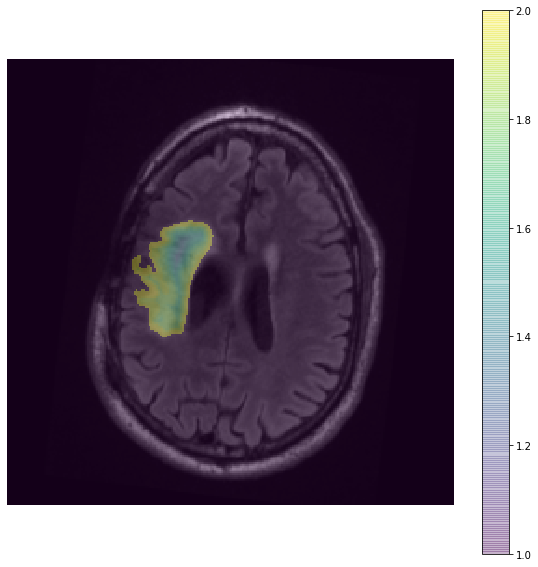

In [49]:
plt.figure(figsize=(10,10))
plt.imshow(yn[:,:,sl].T,cmap='gray')
plt.imshow(edge[:,:,sl].T, alpha=.3)
plt.axis('off')
plt.colorbar()